In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from modules import *

In [3]:
# Criando o DataFrame do arquivo de dados
file = "leituras-janeiro2002-junho2024.xlsx"
registrationsSheet = "Cadastro Junho2024"
measuresSheet = "Resumo"
# df_global = readsheets(file=file,sheetNames=[registrationsSheet,measuresSheet])
# cadastro = df_global[registrationsSheet].copy(deep=True)
# leituras = df_global[measuresSheet].copy(deep=True)
# columnsRegistrations = list(cadastro.columns)
# columnsMeasures = list(leituras.columns)

data = {'Data': pd.date_range('2023-01-01', periods=365),
        'Pluviometria': np.random.randint(0, 100, 365),
        'Elevacao1': np.random.randint(100, 200, 365),
        'Elevacao2': np.random.randint(100, 200, 365),
        'Elevacao3': np.random.randint(100, 200, 365),
        'Elevacao4': np.random.randint(100, 200, 365)}
df = pd.DataFrame(data)

maxDate = max(data["Data"])
minDate = min(data["Data"])

# Carregando os dados do Excel (Substitua pelo seu arquivo)
# df = pd.read_excel('Leituras.xlsx', parse_dates=['Data'])

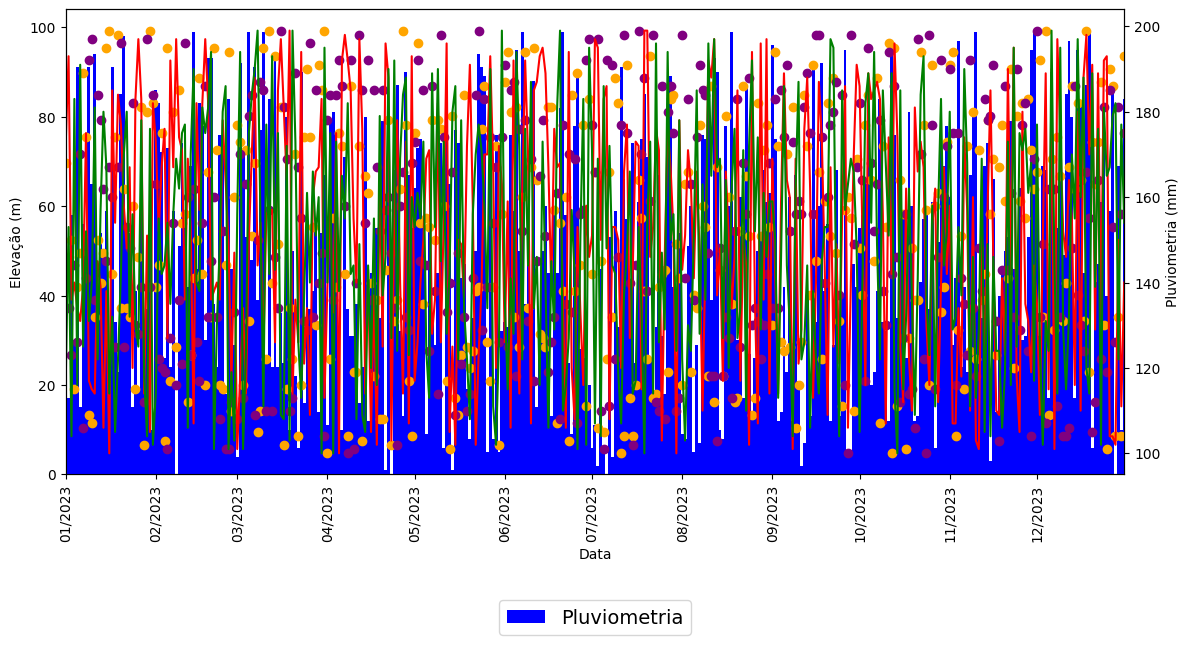

In [11]:
# Configurando o gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eixo Y secundário
ax2 = ax1.twinx()

# Plotando as séries
ax1.bar(df['Data'], df['Pluviometria'], width=1, label='Pluviometria', color='blue',zorder=100)
ax2.plot(df['Data'], df['Elevacao1'], label='Elevacao 1', color='red')
ax2.plot(df['Data'], df['Elevacao2'], label='Elevacao 2', color='green')
ax2.scatter(df['Data'], df['Elevacao3'], label='Elevacao 3', color='orange')
ax2.scatter(df['Data'], df['Elevacao4'], color='purple')  # Sem legenda

# Formatando os eixos
ax1.set_xlabel('Data')
ax1.set_ylabel('Elevação (m)')
ax2.set_ylabel('Pluviometria (mm)')
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
ax1.set_xlim(xmin=minDate,xmax=maxDate)
ax1.xaxis.set_tick_params(rotation=90)

# Legenda
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=False, ncol=5)

# Ajustando o layout
plt.tight_layout()

# Movendo a legenda para baixo
plt.subplots_adjust(bottom=0.2)

# Exibindo o gráfico
plt.show()

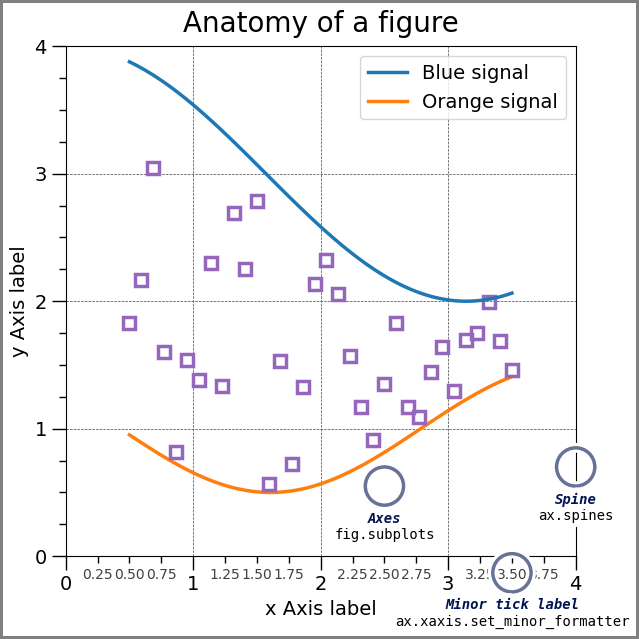

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

royal_blue = [0, 20/256, 82/256]


# make the figure

np.random.seed(19680801)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(7.5, 7.5))
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1)

ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter("{x:.2f}")

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which='major', width=1.0, length=10, labelsize=14)
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10,
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10)
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal")
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9,
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("x Axis label", fontsize=14)
ax.set_ylabel("y Axis label", fontsize=14)
ax.legend(loc="upper right", fontsize=14)


# Annotate the figure

def annotate(x, y, text, code):
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5,
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c)

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue
        ax.text(x, y-0.2, text, zorder=100,
                ha='center', va='top', weight='bold', color=color,
                style='italic', fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black'
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


# annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
# annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
# annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
# annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
# annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
# annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
# annotate(1.52, 4.15, "Title", "ax.set_title")
# annotate(1.75, 2.80, "Line", "ax.plot")
# annotate(2.25, 1.54, "Markers", "ax.scatter")
# annotate(3.00, 3.00, "Grid", "ax.grid")
# annotate(3.60, 3.58, "Legend", "ax.legend")
# annotate(2.5, 0.55, "Axes", "fig.subplots")
# annotate(4, 4.5, "Figure", "plt.figure")
# annotate(0.65, 0.01, "x Axis", "ax.xaxis")
# annotate(0, 0.36, "y Axis", "ax.yaxis")
# annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5')
plt.show()

In [7]:
3+np.cos(np.linspace(0.5, 3.5, 100))

array([3.87758256, 3.86265384, 3.84693302, 3.83043455, 3.81317357,
       3.79516594, 3.77642817, 3.75697749, 3.73683175, 3.71600945,
       3.69452971, 3.67241224, 3.64967737, 3.62634596, 3.60243944,
       3.57797975, 3.55298936, 3.52749122, 3.50150873, 3.47506575,
       3.44818657, 3.42089586, 3.39321868, 3.36518045, 3.3368069 ,
       3.30812411, 3.27915839, 3.24993634, 3.2204848 , 3.19083082,
       3.16100161, 3.13102457, 3.10092722, 3.0707372 , 3.04048223,
       3.01019009, 2.97988859, 2.94960556, 2.9193688 , 2.88920608,
       2.85914509, 2.82921343, 2.79943859, 2.7698479 , 2.74046854,
       2.71132748, 2.68245149, 2.65386707, 2.62560046, 2.59767764,
       2.57012422, 2.54296552, 2.51622647, 2.48993163, 2.46410513,
       2.43877069, 2.41395157, 2.38967056, 2.36594997, 2.34281155,
       2.32027657, 2.29836572, 2.27709911, 2.25649627, 2.23657611,
       2.21735693, 2.19885638, 2.18109145, 2.16407843, 2.14783297,
       2.13236996, 2.11770362, 2.1038474 , 2.09081404, 2.07861

matplotlib.legend.Legend

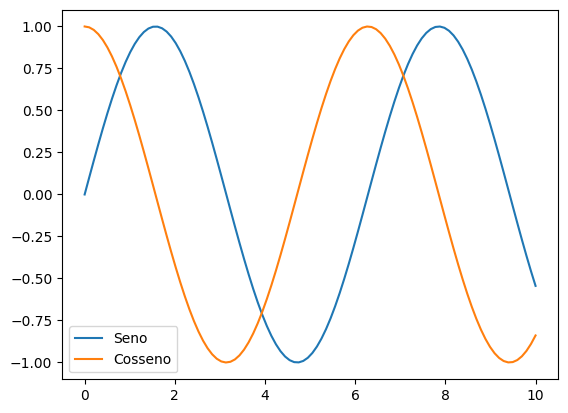

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Criando um gráfico simples
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

fig, ax = plt.subplots()

# Plotando gráficos
ax.plot(x, y1, label='Seno')
ax.plot(x, y2, label='Cosseno')

# Adicionando uma legenda
legend = ax.legend()
def getWindowsLegend(legend):
    # Obtendo a posição e o tamanho da legenda
    bbox = legend.get_window_extent()

    # Convertendo as coordenadas de janela para coordenadas da figura
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())

    # Imprimindo a posição e o tamanho
    print(f'Posição (x0, y0): ({bbox.x0}, {bbox.y0})')
    print(f'Tamanho (largura, altura): ({bbox.width}, {bbox.height})')
    return bbox
type(legend)

In [4]:
a = {1:{1:1}}
a.update({1:{2:2}})
a

{1: {2: 2}}